In [2]:
! unzip /content/climate.zip

Archive:  /content/climate.zip
   creating: climate/
   creating: climate/foggy/
  inflating: climate/foggy/phoenix1x-1635969740513.min.png  
  inflating: climate/foggy/th.jpg    
  inflating: climate/foggy/th10.jpg  
  inflating: climate/foggy/th100.jpg  
  inflating: climate/foggy/th101.jpg  
  inflating: climate/foggy/th102.jpg  
  inflating: climate/foggy/th103.jpg  
  inflating: climate/foggy/th104.jpg  
  inflating: climate/foggy/th105.jpg  
  inflating: climate/foggy/th106.jpg  
  inflating: climate/foggy/th107.jpg  
  inflating: climate/foggy/th108.jpg  
  inflating: climate/foggy/th109.jpg  
  inflating: climate/foggy/th11.jpg  
  inflating: climate/foggy/th110.jpg  
  inflating: climate/foggy/th111.jpg  
  inflating: climate/foggy/th112.jpg  
  inflating: climate/foggy/th113.jpg  
  inflating: climate/foggy/th114.jpg  
  inflating: climate/foggy/th115.jpg  
  inflating: climate/foggy/th116.jpg  
  inflating: climate/foggy/th117.jpg  
  inflating: climate/foggy/th118.jpg  
  i

In [ ]:
! unzip /content/temperature.zip

In [3]:
pip install tensorflow matplotlib

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [12]:
# Define ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Horizontal flips
    fill_mode='nearest'  # Fill missing pixels
)


In [22]:
# Define ImageDataGenerator for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test data


In [15]:
# Define train and validation directories
train_dir = ('/content/climate')
test_dir = ('/content/temperature')

In [16]:
# Flow images from directory for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'      # Use 'categorical' if there are more than 2 classes
)

Found 949 images belonging to 3 classes.


In [23]:
# Create the testing data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 563 images belonging to 2 classes.


In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (use softmax for multi-class)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Number of batches per epoch (usually # images / batch_size)
    epochs=10,
    validation_data=test_generator,
    validation_steps=50  # Number of batches for validation
)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 30/100 ━━━━━━━━━━━━━━━━━━━━ 2:18 2s/step - accuracy: 0.3364 - loss: -198.3575

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 671ms/step - accuracy: 0.3377 - loss: -886.3789 - val_accuracy: 0.4245 - val_loss: 38318.3633
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 691ms/step - accuracy: 0.3441 - loss: -109049.8438 - val_accuracy: 0.4245 - val_loss: 2519922.2500
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 645ms/step - accuracy: 0.3358 - loss: -2528594.5000 - val_accuracy: 0.4245 - val_loss: 38848112.0000
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 631ms/step - accuracy: 0.3475 - loss: -19832674.0000 - val_accuracy: 0.4245 - val_loss: 278626592.0000
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 646ms/step - accuracy: 0.3324 - loss: -100842744.0000 - val_accuracy: 0.4245 - val_loss: 985488448.0000
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 683ms/step - accuracy: 0.3372 - loss: -338587840.0000 - val_accuracy: 0.4245 - val_loss: 2768912640.0000
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 681ms/step - accuracy: 0.3418 - loss: -997345216.0000 - val_accuracy: 0.4245 - val_loss: 83122723

In [30]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print(f"Test accuracy: {test_acc}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.4294 - loss: 77410836480.0000 
Test accuracy: 0.42451155185699463


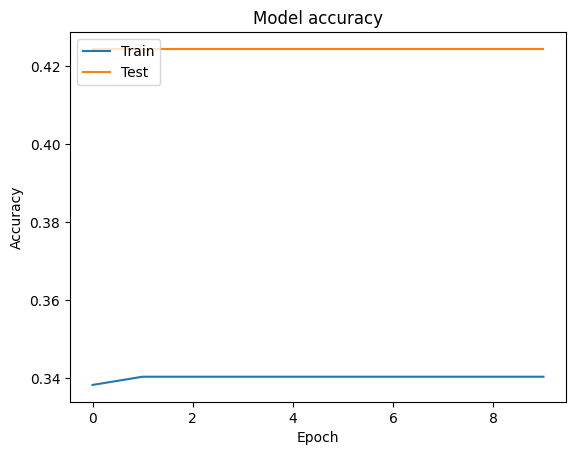

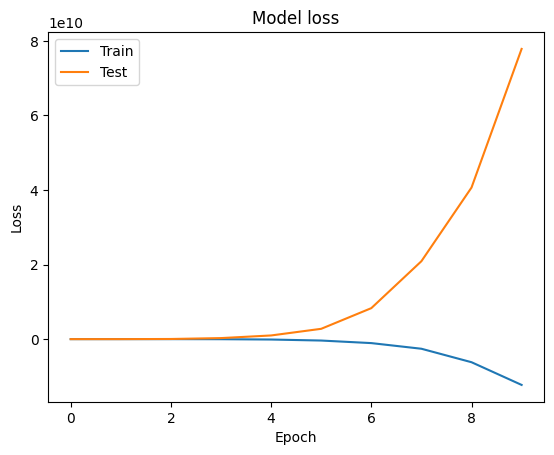

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()